In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

In [15]:
data = pd.read_csv("neo.csv")

In [16]:
data.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [17]:
data.describe()

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,9.083600e+04,90836.000000,90836.000000,90836.000000,9.083600e+04,90836.000000
mean,1.438288e+07,0.127432,0.284947,48066.918918,3.706655e+07,23.527103
std,2.087202e+07,0.298511,0.667491,25293.296961,2.235204e+07,2.894086
min,2.000433e+06,0.000609,0.001362,203.346433,6.745533e+03,9.230000
25%,3.448110e+06,0.019256,0.043057,28619.020645,1.721082e+07,21.340000
50%,3.748362e+06,0.048368,0.108153,44190.117890,3.784658e+07,23.700000
75%,3.884023e+06,0.143402,0.320656,62923.604633,5.654900e+07,25.700000
max,5.427591e+07,37.892650,84.730541,236990.128088,7.479865e+07,33.200000


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


In [19]:
data.isna().sum()

id                    0
name                  0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
orbiting_body         0
sentry_object         0
absolute_magnitude    0
hazardous             0
dtype: int64

In [20]:
for i in ["orbiting_body","sentry_object","hazardous"]:
    print(i)
    print(data[i].value_counts())

orbiting_body
Earth    90836
Name: orbiting_body, dtype: int64
sentry_object
False    90836
Name: sentry_object, dtype: int64
hazardous
False    81996
True      8840
Name: hazardous, dtype: int64


In [21]:
data.drop(columns=["id","name","orbiting_body","sentry_object"], inplace=True)

In [22]:
data.select_dtypes(include="number").columns

Index(['est_diameter_min', 'est_diameter_max', 'relative_velocity',
       'miss_distance', 'absolute_magnitude'],
      dtype='object')

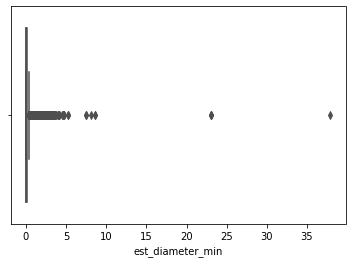

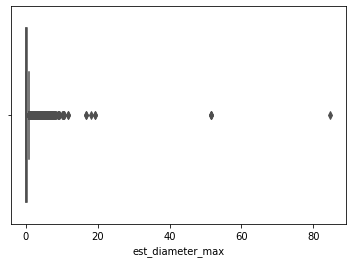

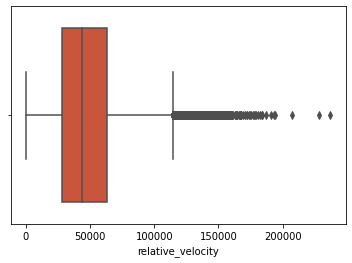

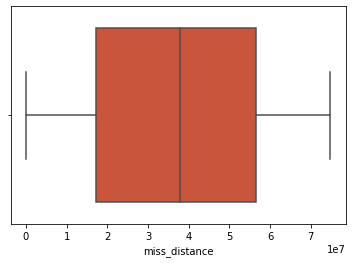

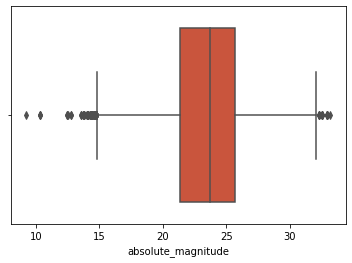

In [23]:
for i in ['est_diameter_min', 'est_diameter_max', 'relative_velocity',
       'miss_distance', 'absolute_magnitude']:
       plt.subplots()
       sns.boxplot(x=i, data=data, color="#E14625")
       plt.show()

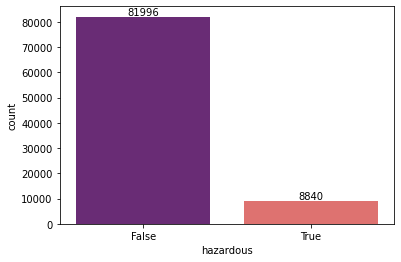

In [24]:
haz = sns.countplot(x="hazardous", data=data, palette="magma")
haz.bar_label(haz.containers[0])
plt.show()

In [25]:
X = data.drop(columns="hazardous")
Y = data["hazardous"]

In [26]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X, Y)

In [27]:
print(xTrain.shape)
print(xTest.shape)
print(yTrain.shape) 
print(yTest.shape)

(68127, 5)
(22709, 5)
(68127,)
(22709,)


In [28]:
# Importing metrics
from sklearn.metrics import classification_report, recall_score, precision_score, f1_score

In [29]:
results = pd.DataFrame(columns=["Model","TrainScore","TestScore","PrecisionTrue"])

In [30]:
import warnings
warnings.filterwarnings("ignore")

In [31]:
# Defining a function for metrics.
# Logistic Regression
# GaussianNB
# DecisionTreeClassifier
# RandomForestClassifier
# KNN
# SVC
def classificationmodel(test):
    test.fit(xTrain, yTrain)
    scoretrain = test.score(xTrain, yTrain)
    scoretest = test.score(xTest, yTest)
    print("Score of the training dataset:", test.score(xTrain, yTrain))
    print("Score of the testing dataset:", test.score(xTest, yTest), "\n")
    print("Precision score for True:", precision_score(y_true=yTest, y_pred=test.predict(xTest), pos_label=True))
    print(classification_report(yTest, test.predict(xTest)))
    plot_confusion_matrix(test, xTest, yTest)
    if len(results.index) == 0:
        results.loc[len(results.index)] = ["LR", scoretrain, scoretest, precision_score(y_true=yTest, y_pred=test.predict(xTest), pos_label=True)]
    elif len(results.index) == 1:
        results.loc[len(results.index)] = ["GNB", scoretrain, scoretest, precision_score(y_true=yTest, y_pred=test.predict(xTest), pos_label=True)]
    elif len(results.index) == 2:
        results.loc[len(results.index)] = ["DTC", scoretrain, scoretest, precision_score(y_true=yTest, y_pred=test.predict(xTest), pos_label=True)]
    elif len(results.index) == 3:
        results.loc[len(results.index)] = ["RFC", scoretrain, scoretest, precision_score(y_true=yTest, y_pred=test.predict(xTest), pos_label=True)]
    elif len(results.index) == 4:
        results.loc[len(results.index)] = ["KNN", scoretrain, scoretest, precision_score(y_true=yTest, y_pred=test.predict(xTest), pos_label=True)]
    elif len(results.index) == 5:
        results.loc[len(results.index)] = ["GBC", scoretrain, scoretest, precision_score(y_true=yTest, y_pred=test.predict(xTest), pos_label=True)]

Score of the training dataset: 0.9030927532402718
Score of the testing dataset: 0.9014487648069047 

Precision score for True: 0.0
              precision    recall  f1-score   support

       False       0.90      1.00      0.95     20471
        True       0.00      0.00      0.00      2238

    accuracy                           0.90     22709
   macro avg       0.45      0.50      0.47     22709
weighted avg       0.81      0.90      0.85     22709



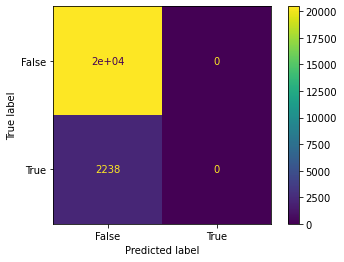

In [32]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
classificationmodel(LR)

In [33]:
results

,Model,TrainScore,TestScore,PrecisionTrue
0,LR,0.903093,0.901449,0.0


# Over sampling data using RandomOverSampler

In [34]:
results = pd.DataFrame(columns=["Model","TrainScore","TestScore","PrecisionTrue"])

In [35]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy="minority")

X, Y = ros.fit_resample(X, Y)

xTrain, xTest, yTrain, yTest = train_test_split(X,Y)

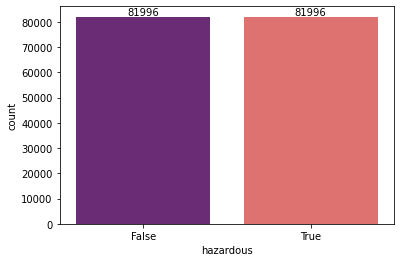

In [36]:
haz = sns.countplot(x=Y, palette="magma")
haz.bar_label(haz.containers[0])
plt.show()

Score of the training dataset: 0.570979072149861
Score of the testing dataset: 0.5667593541148349 

Precision score for True: 0.5454290816147894
              precision    recall  f1-score   support

       False       0.62      0.37      0.46     20641
        True       0.55      0.77      0.64     20357

    accuracy                           0.57     40998
   macro avg       0.58      0.57      0.55     40998
weighted avg       0.58      0.57      0.55     40998



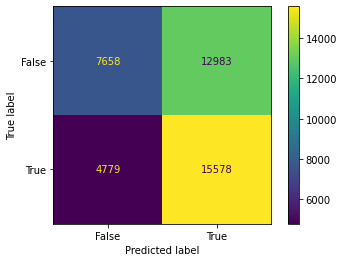

In [37]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
classificationmodel(LR)

Score of the training dataset: 0.6092004488023806
Score of the testing dataset: 0.6110541977657447 

Precision score for True: 0.6297429260544738
              precision    recall  f1-score   support

       False       0.60      0.70      0.64     20641
        True       0.63      0.53      0.57     20357

    accuracy                           0.61     40998
   macro avg       0.61      0.61      0.61     40998
weighted avg       0.61      0.61      0.61     40998



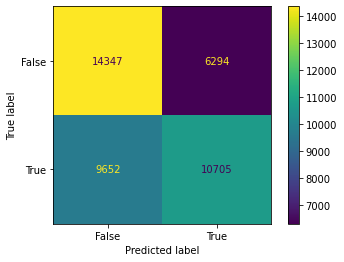

In [38]:
from sklearn.naive_bayes import GaussianNB
GSS = GaussianNB()
classificationmodel(GSS)

Score of the training dataset: 1.0
Score of the testing dataset: 0.9665837357919899 

Precision score for True: 0.9373473994563966
              precision    recall  f1-score   support

       False       1.00      0.93      0.97     20641
        True       0.94      1.00      0.97     20357

    accuracy                           0.97     40998
   macro avg       0.97      0.97      0.97     40998
weighted avg       0.97      0.97      0.97     40998



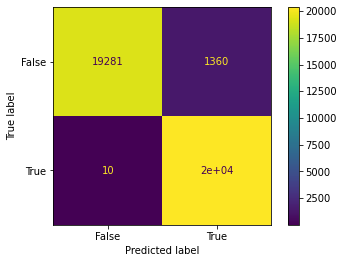

In [39]:
from sklearn.tree import DecisionTreeClassifier
DTR = DecisionTreeClassifier()
classificationmodel(DTR)

Score of the training dataset: 1.0
Score of the testing dataset: 0.966388604322162 

Precision score for True: 0.9367607124775624
              precision    recall  f1-score   support

       False       1.00      0.93      0.97     20641
        True       0.94      1.00      0.97     20357

    accuracy                           0.97     40998
   macro avg       0.97      0.97      0.97     40998
weighted avg       0.97      0.97      0.97     40998



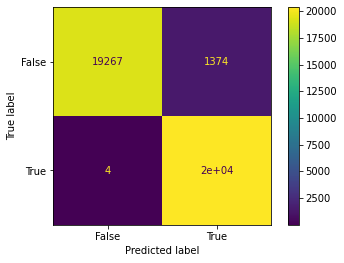

In [40]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()
classificationmodel(RFC)

Score of the training dataset: 0.8967998438948241
Score of the testing dataset: 0.8466510561490804 

Precision score for True: 0.7709312177462836
              precision    recall  f1-score   support

       False       0.98      0.71      0.82     20641
        True       0.77      0.98      0.86     20357

    accuracy                           0.85     40998
   macro avg       0.87      0.85      0.84     40998
weighted avg       0.87      0.85      0.84     40998



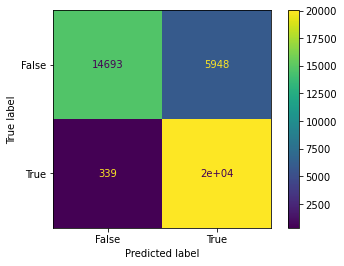

In [41]:
from sklearn.neighbors import KNeighborsClassifier
KNNC = KNeighborsClassifier()
classificationmodel(KNNC)

Score of the training dataset: 0.8791241849195895
Score of the testing dataset: 0.8770671740084882 

Precision score for True: 0.8059850573334931
              precision    recall  f1-score   support

       False       0.99      0.76      0.86     20641
        True       0.81      0.99      0.89     20357

    accuracy                           0.88     40998
   macro avg       0.90      0.88      0.88     40998
weighted avg       0.90      0.88      0.88     40998



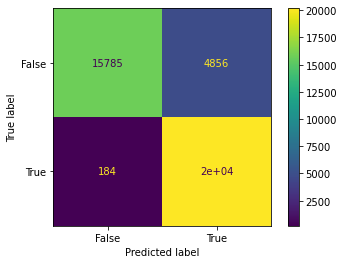

In [42]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier()
classificationmodel(GBC)

In [43]:
results

,Model,TrainScore,TestScore,PrecisionTrue
0,LR,0.570979,0.566759,0.545429
1,GNB,0.609200,0.611054,0.629743
2,DTC,1.000000,0.966584,0.937347
3,RFC,1.000000,0.966389,0.936761
4,KNN,0.896800,0.846651,0.770931
5,GBC,0.879124,0.877067,0.805985


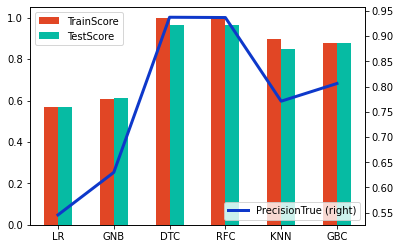

In [44]:
results[["TrainScore","TestScore"]].plot(kind="bar", color=["#E14625","#06BBA3"])
plt.xticks(range(0,len(results["Model"])), results["Model"])
results["PrecisionTrue"].plot(c="#0E38CA", linewidth=3, secondary_y=True, label="PrecisionTrue")
plt.legend()
plt.show()

In [45]:
# Changing max_depth to avoid overfitting.
DTC2 = DecisionTreeClassifier(max_depth=32)
DTC2.fit(xTrain, yTrain)
print("Score of training dataset:",DTC2.score(xTrain, yTrain))
print("Score of testing dataset:",DTC2.score(xTest, yTest))
print(classification_report(yTest, DTC2.predict(xTest)))

Score of training dataset: 0.9763321788054702
Score of testing dataset: 0.9489243377725742
              precision    recall  f1-score   support

       False       1.00      0.90      0.95     20641
        True       0.91      1.00      0.95     20357

    accuracy                           0.95     40998
   macro avg       0.95      0.95      0.95     40998
weighted avg       0.95      0.95      0.95     40998



In [46]:
# Changing max_depth to avoid overfitting.
RFC2 = RandomForestClassifier(max_depth=32)
RFC2.fit(xTrain, yTrain)
print("Score of training dataset:",RFC2.score(xTrain, yTrain))
print("Score of testing dataset:",RFC2.score(xTest, yTest))
print(classification_report(yTest, RFC2.predict(xTest)))

Score of training dataset: 0.9925850041465437
Score of testing dataset: 0.9556807649153617
              precision    recall  f1-score   support

       False       1.00      0.91      0.95     20641
        True       0.92      1.00      0.96     20357

    accuracy                           0.96     40998
   macro avg       0.96      0.96      0.96     40998
weighted avg       0.96      0.96      0.96     40998

